Rainfall Prediction Using Python

In [ ]:
#Import libraries and Pakages
import warnings
import os
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
#Load Data
df = pd.read_csv("/weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(145460, 23)

In [ ]:
round(df.isna().sum()/df.shape[0]*100 , 4)

Date              0.0000
Location          0.0000
MinTemp           1.0209
MaxTemp           0.8669
Rainfall          2.2419
Evaporation      43.1665
Sunshine         48.0098
WindGustDir       7.0989
WindGustSpeed     7.0555
WindDir9am        7.2639
WindDir3pm        2.9066
WindSpeed9am      1.2148
WindSpeed3pm      2.1050
Humidity9am       1.8246
Humidity3pm       3.0984
Pressure9am      10.3568
Pressure3pm      10.3314
Cloud9am         38.4216
Cloud3pm         40.8071
Temp9am           1.2148
Temp3pm           2.4811
RainToday         2.2419
RainTomorrow      2.2460
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [ ]:
cat_df = df.select_dtypes('object')
cat_df.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [ ]:
cat_df.nunique()

Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64

In [ ]:
cat_df.isna().mean()*100

Date            0.000000
Location        0.000000
WindGustDir     7.098859
WindDir9am      7.263853
WindDir3pm      2.906641
RainToday       2.241853
RainTomorrow    2.245978
dtype: float64

In [ ]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [ ]:
d = df['RainTomorrow'].value_counts()
labels = list(d.index)
d

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

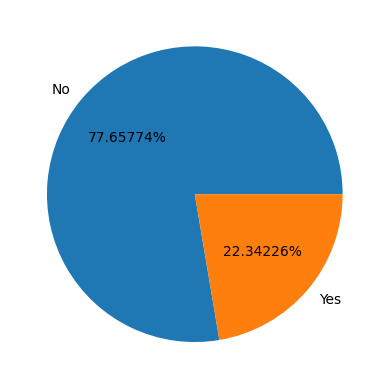

In [ ]:
plt.pie(d, labels=labels, autopct='%1.5f%%')
plt.show()

In [ ]:
df.dropna(subset=['RainToday'], inplace=True)

In [ ]:
d = df['RainToday'].value_counts()
labels = list(d.index)
d

No     109332
Yes     31455
Name: RainToday, dtype: int64

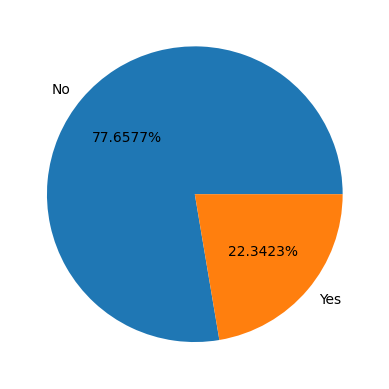

In [ ]:
plt.pie(d, labels=labels, autopct='%1.4f%%')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
num_df = df.select_dtypes(exclude='object')
num_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [ ]:
def plot_scatter(column_to_category, data, row=3, col=3):
    for i in range(0, len(column_to_category)):
        plt.subplot(row, col, i+1)
        #plt.scatter(x = column_to_category[i], y = 'SalePrice', data = data)
        df.boxplot(column_to_category[i])
        plt.title(f"{column_to_category[i]}" ,fontsize=20)
    plt.show()

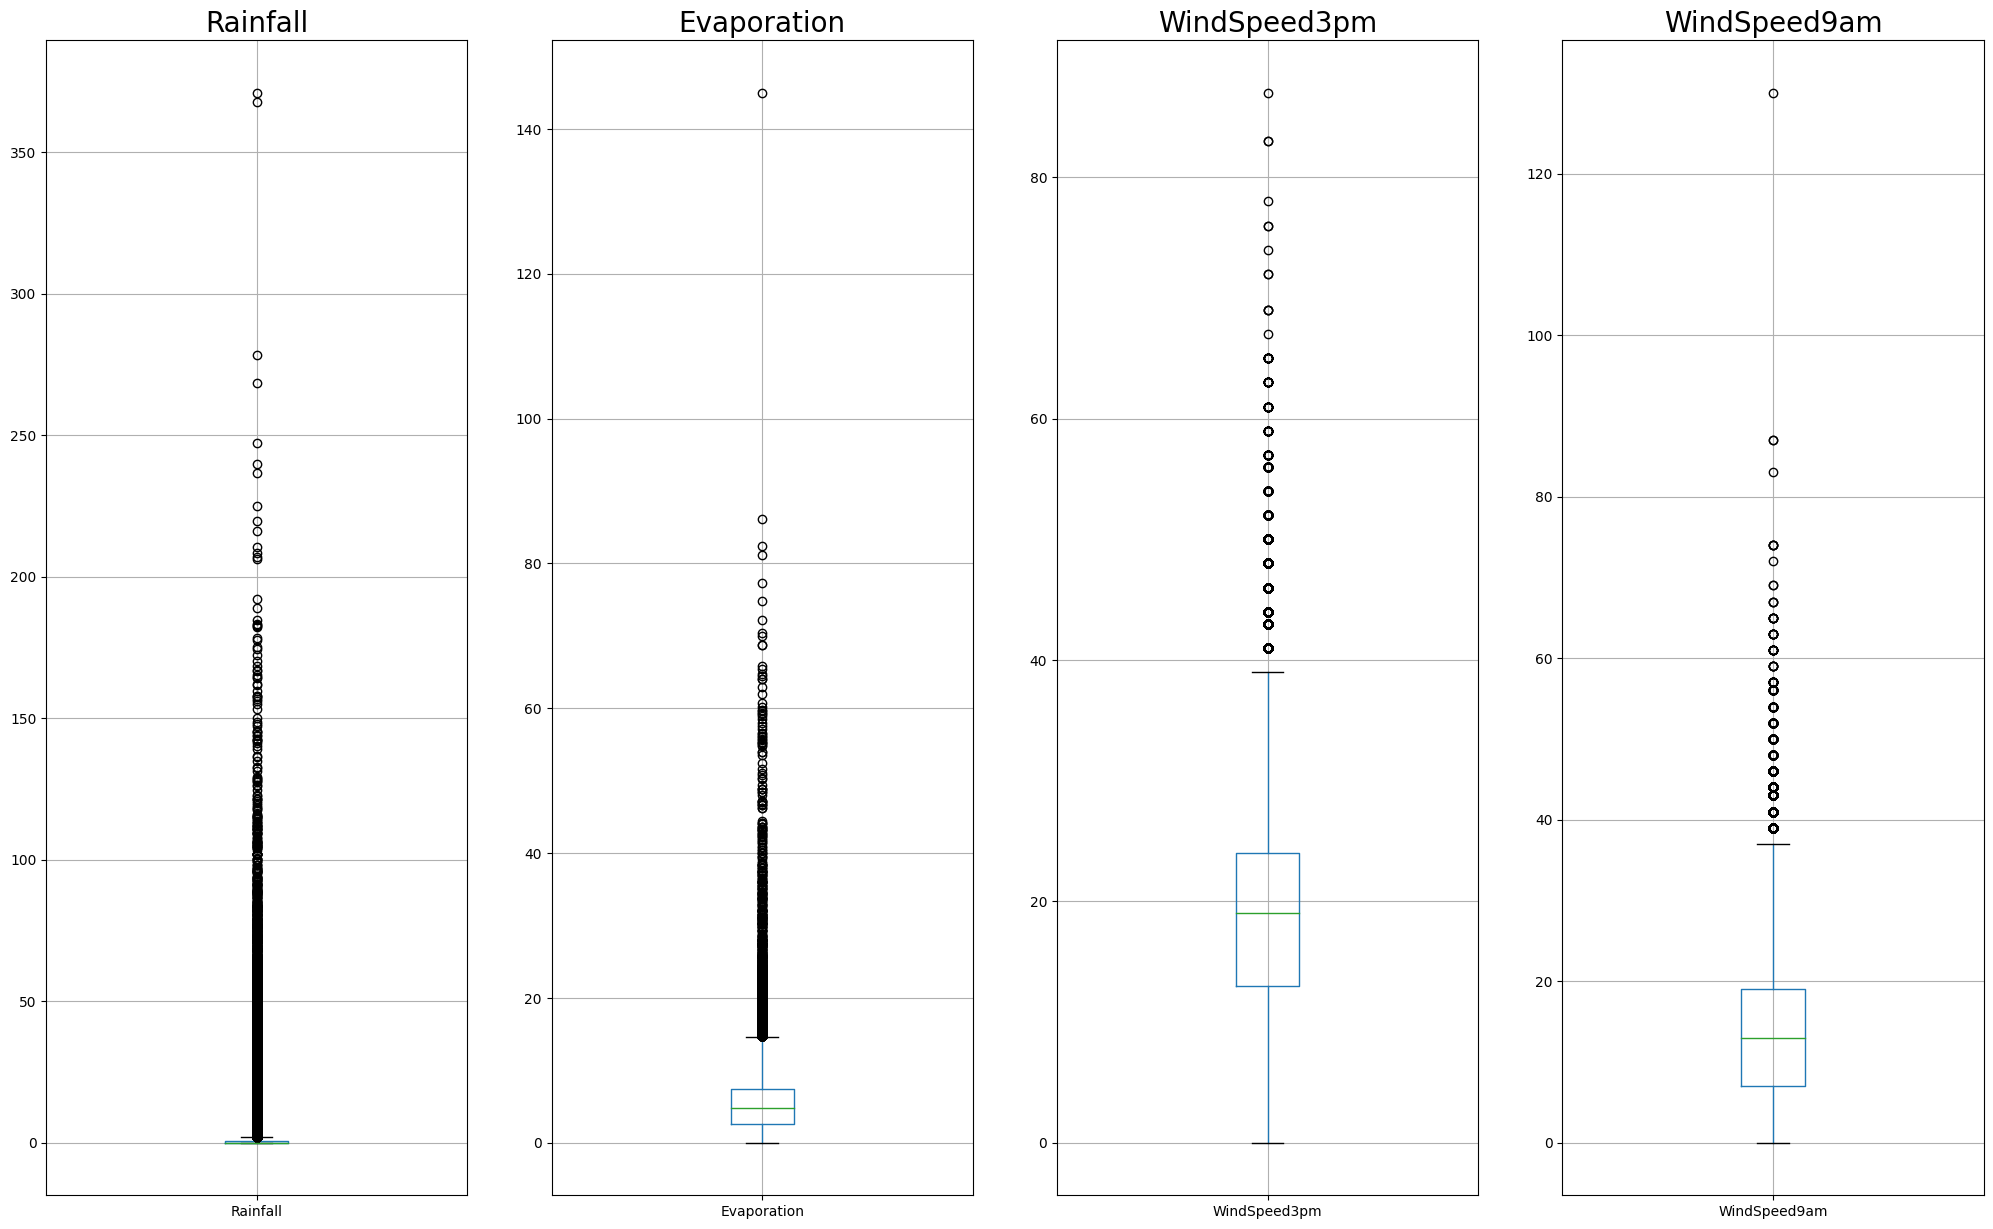

In [ ]:
column_to_category = ['Rainfall', 'Evaporation', 'WindSpeed3pm', 'WindSpeed9am']
plt.figure(figsize=(25, 15))
plot_scatter(column_to_category, df, row=1, col=4)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [ ]:
cat_df = df.select_dtypes('object')
num_df = df.select_dtypes(exclude='object')

In [ ]:
cat_df.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No


In [ ]:
#fixing null values of categorical columns
for i in cat_df.columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
num_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [ ]:
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [ ]:
cat_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
dummy_features = pd.get_dummies(df[cat_columns], drop_first=True)

# create new dataframe after creating dummy var
df = pd.concat([df, dummy_features], axis=1)

df = df.drop(cat_columns, axis=1)

df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
a1 = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed',
      'WindSpeed9am', 'WindSpeed3pm']
a2 = ['Pressure9am', 'Pressure3pm', 'Rainfall']
a4 = []
a3 = ['Humidity9am','Humidity3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

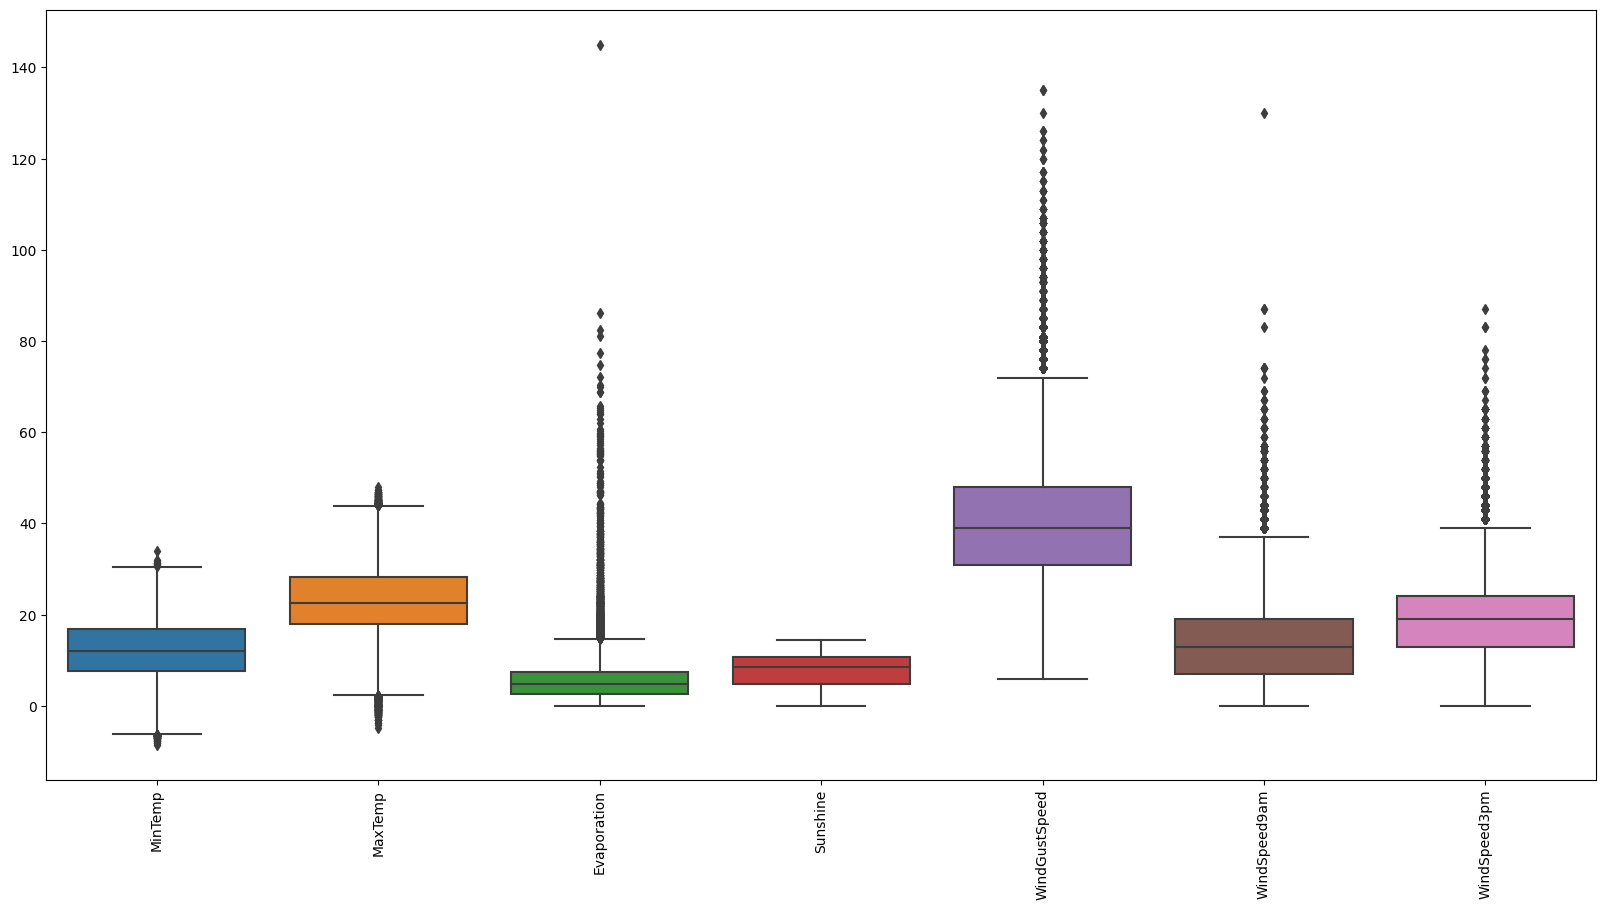

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a1])
plt.xticks(rotation=90)
plt.show()
# So many outliers

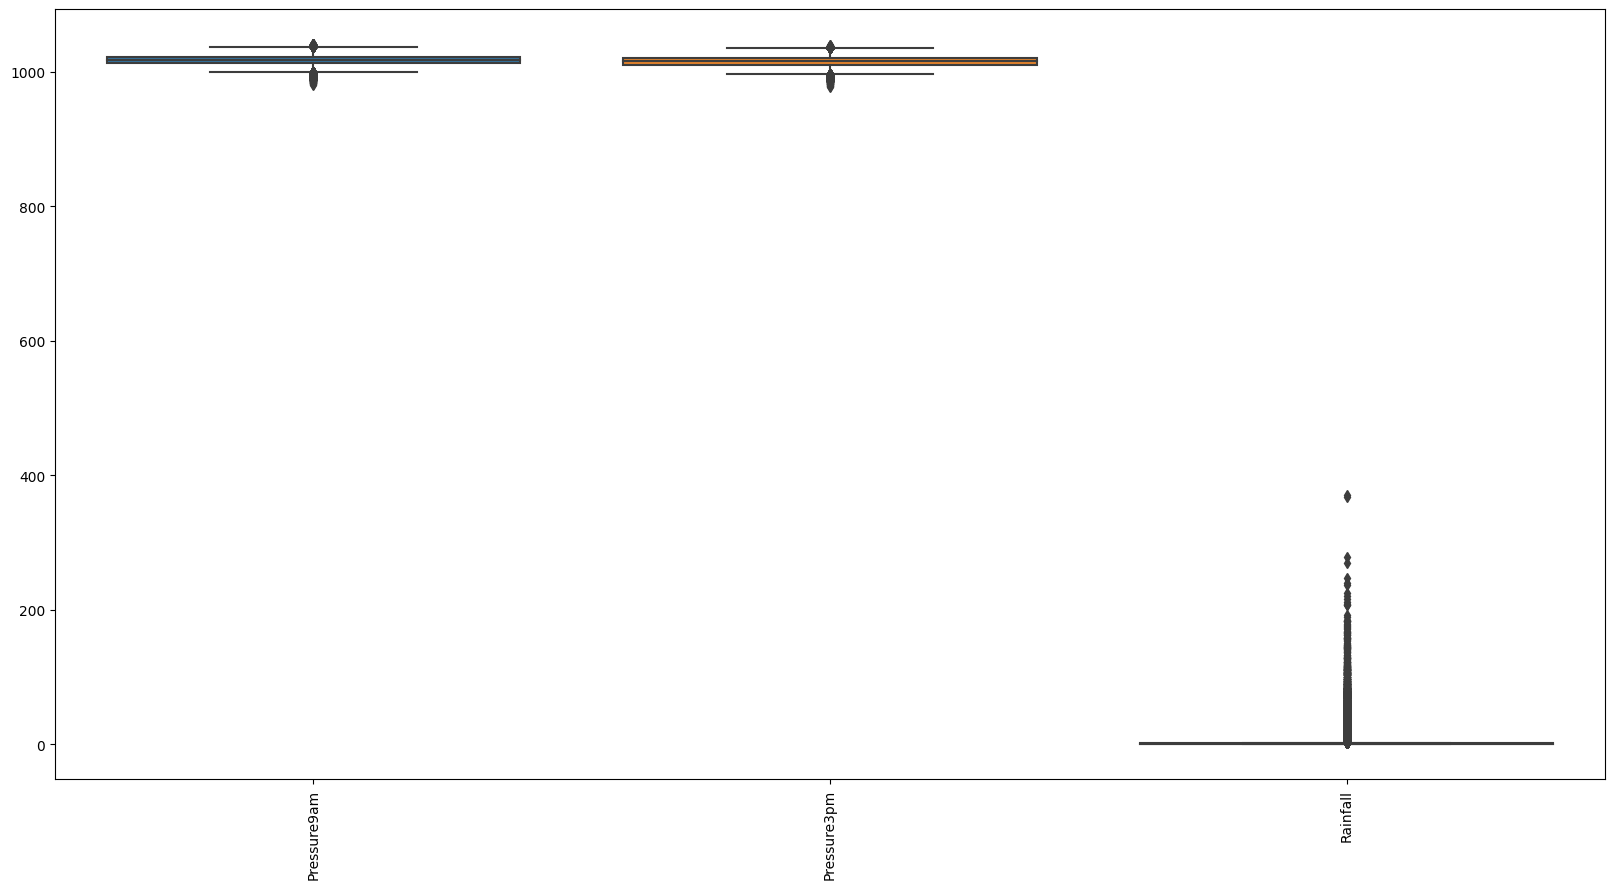

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a2])
plt.xticks(rotation=90)
plt.show()
# So many outliers

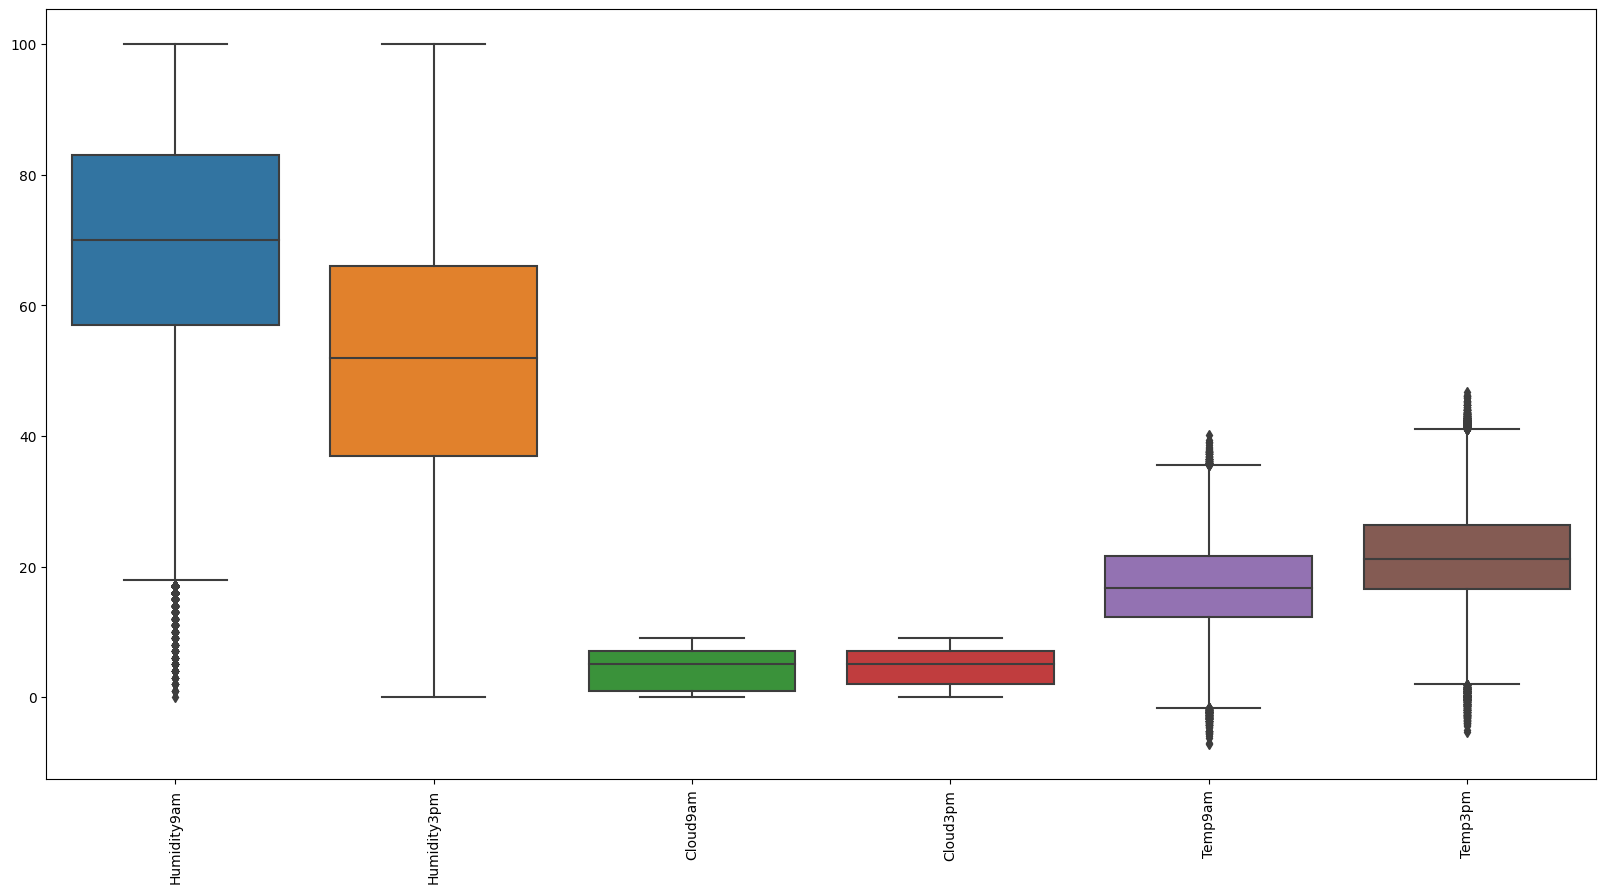

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a3])
plt.xticks(rotation=90)
plt.show()
# So many outliers

In [ ]:
def plot_hist(column_to_category, data, row=3, col=3):
    for i in range(0, len(column_to_category)):
        plt.subplot(row, col, i+1)
#         plt.scatter(x = column_to_category[i], y = 'SalePrice', data = data)
#         df.boxplot(column_to_category[i])
        sns.histplot(data=data, x=column_to_category[i], kde=True)
        plt.title(f"{column_to_category[i]}" ,fontsize=20)
    plt.show()

In [ ]:
sk1 = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine','WindGustSpeed',
      'WindSpeed9am', 'WindSpeed3pm', 'Rainfall']
sk2 = ['Pressure9am', 'Pressure3pm', 'Humidity9am','Humidity3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']

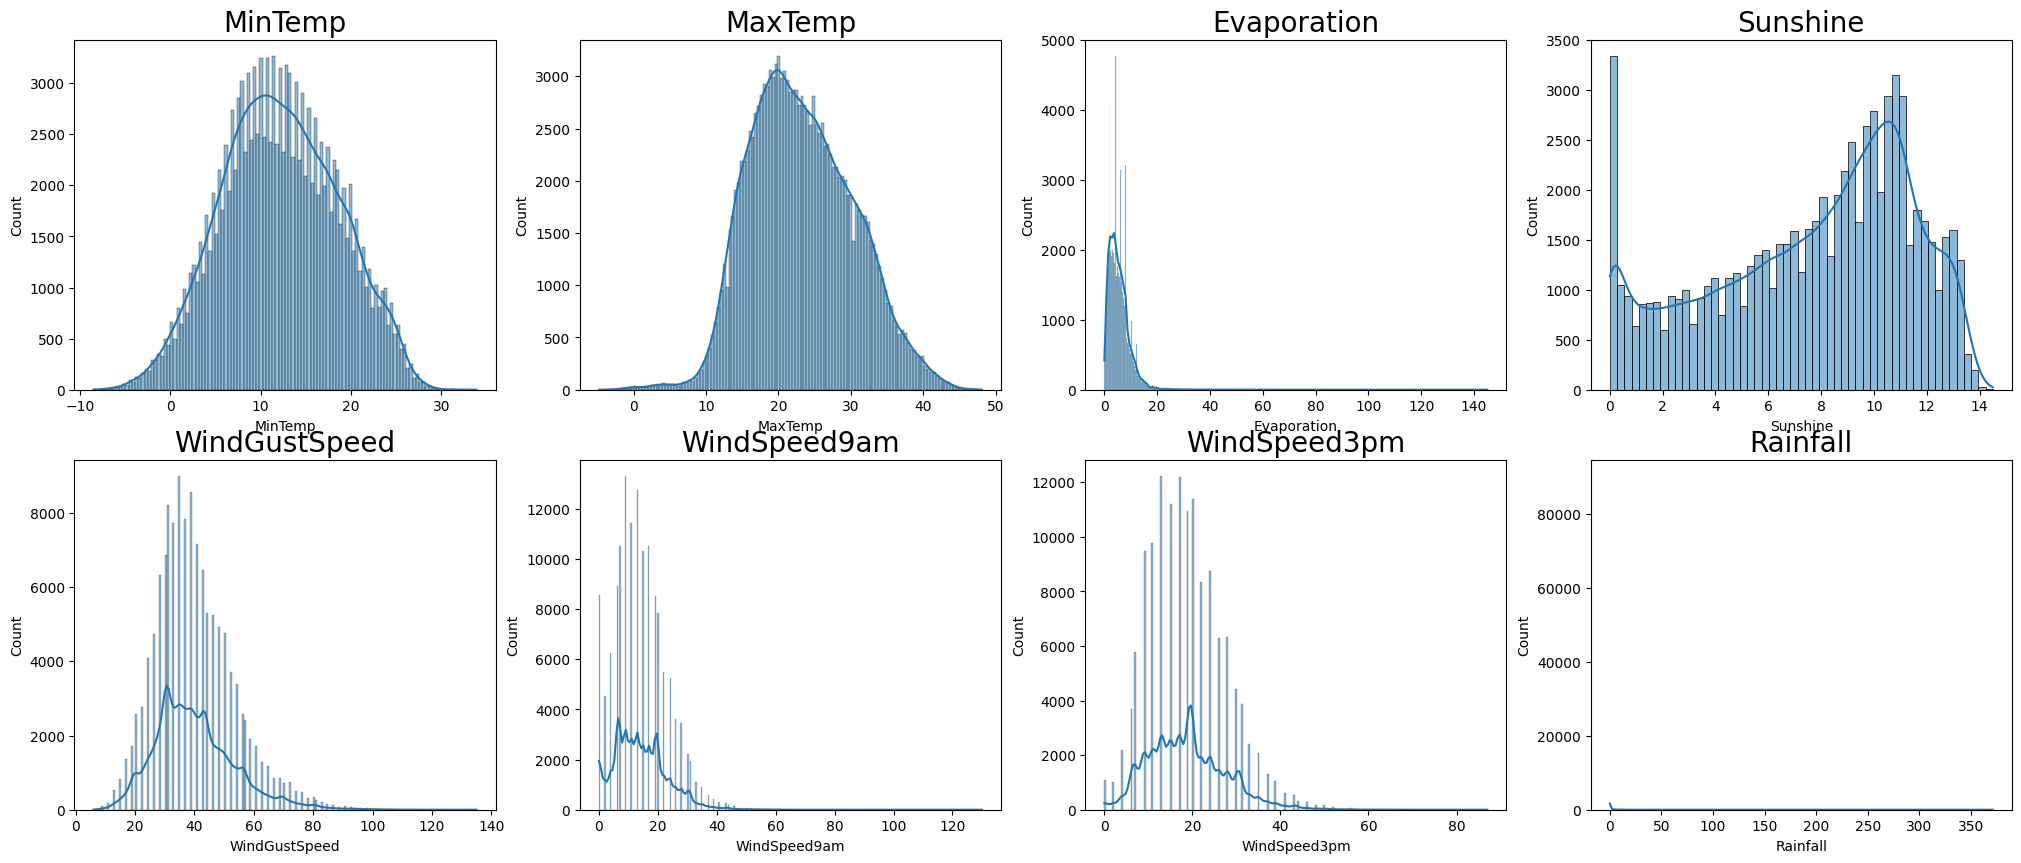

In [ ]:
plt.figure(figsize=(25,10))
plot_hist(sk1, df, row=2, col=4)

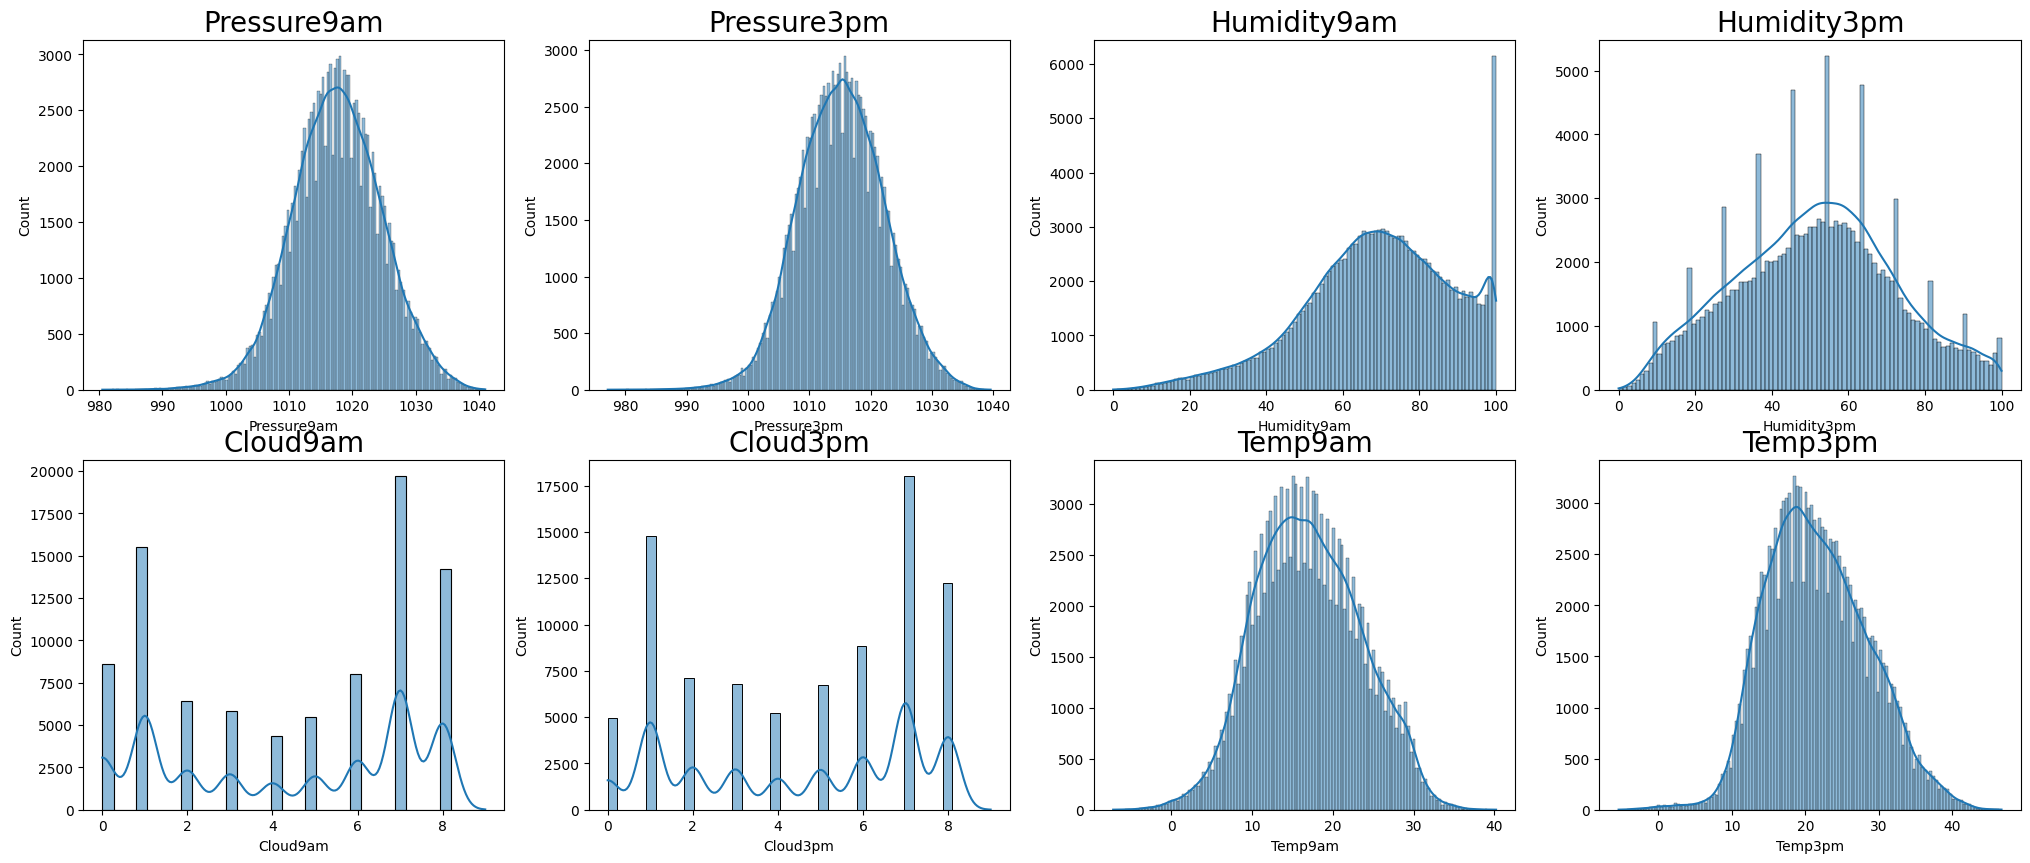

In [ ]:
plt.figure(figsize=(25,10))
plot_hist(sk2, df, row=2, col=4)

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.shape

(140787, 114)

In [ ]:
def remove_out(df_clean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = df_clean[num_cols].quantile(lbv)
    Q3 = df_clean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        df_clean = df_clean[(df_clean[i]>=lb[i]) & (df_clean[i]<=hb[i])]
    return df_clean

In [ ]:
cols = ['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Evaporation', 'Sunshine']

df_clean = remove_out(df_clean,cols, lbv=0.10, hbv=0.90)
df_clean.shape

(55725, 114)

In [ ]:
d = df_clean['RainTomorrow'].value_counts()
labels = list(d.index)
d

0    44405
1    11320
Name: RainTomorrow, dtype: int64

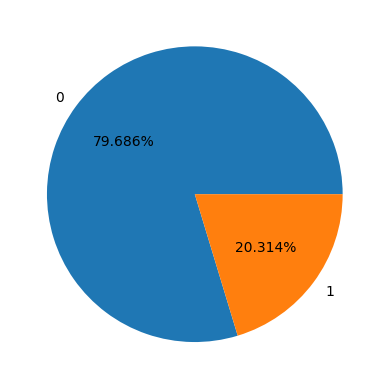

In [ ]:
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

In [ ]:
X = df_clean.drop(['RainTomorrow'], axis=1)

y = df_clean['RainTomorrow']

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X, y = sm.fit_resample(X, y)

y.value_counts()

0    44405
1    44405
Name: RainTomorrow, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=123
)

In [ ]:
X_train.shape, X_test.shape

((71048, 113), (17762, 113))

In [ ]:
xgb_cl = XGBClassifier(
 learning_rate =0.1,
 n_estimators=120,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.9
)
xgb_cl.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=120, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_pred_test = xgb_cl.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.902544758473145

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[8131,  750],
       [ 981, 7900]])

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      8881
           1       0.91      0.89      0.90      8881

    accuracy                           0.90     17762
   macro avg       0.90      0.90      0.90     17762
weighted avg       0.90      0.90      0.90     17762



In [ ]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
)
model=Sequential()
model.add(Dense(256,input_dim=X_train.shape[1],activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy', Precision(), Recall()]
)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_split=0.2,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
889/889 [==============================] - 8s 5ms/step - loss: 2.9815 - accuracy: 0.5024 - precision: 0.5013 - recall: 0.6526 - val_loss: 0.6934 - val_accuracy: 0.5027 - val_precision: 0.5027 - val_recall: 1.0000
Epoch 2/30
889/889 [==============================] - 4s 4ms/step - loss: 0.6981 - accuracy: 0.4942 - precision: 0.4948 - recall: 0.6228 - val_loss: 0.6932 - val_accuracy: 0.5027 - val_precision: 0.5027 - val_recall: 1.0000
Epoch 3/30
889/889 [==============================] - 4s 4ms/step - loss: 0.6950 - accuracy: 0.4996 - precision: 0.4991 - recall: 0.5686 - val_loss: 0.6931 - val_accuracy: 0.4973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
889/889 [==============================] - 3s 3ms/step - loss: 0.6943 - accuracy: 0.4982 - precision: 0.4977 - recall: 0.5311 - val_loss: 0.6931 - val_accuracy: 0.4973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
889/889 [==============================] - 3s 4ms/step - loss: 0.6936 - accur

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''

    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

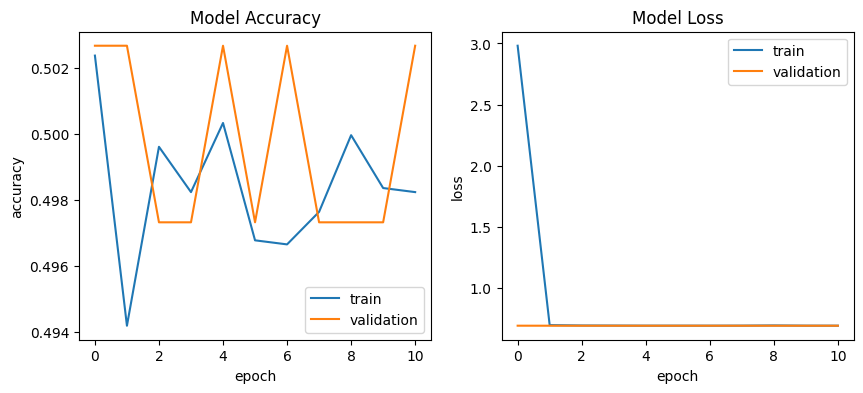

In [ ]:
plot_training_hist(history)

In [ ]:
y_pred = model.predict(X_test)

556/556 [==============================] - 1s 943us/step


In [ ]:
# y_pred=(y_pred>0.5)
y_pred = np.squeeze(np.where(y_pred>0.5, 1, 0))
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test.values, np.array(y_pred)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8881
           1       0.50      1.00      0.67      8881

    accuracy                           0.50     17762
   macro avg       0.25      0.50      0.33     17762
weighted avg       0.25      0.50      0.33     17762

